**Consumer Guide for Budget Optimization**

The objective is to assist consumers in making informed decisions when purchasing laptops within specific budget constraints. With the increasing variety of laptops available in the market, consumers often find it challenging to navigate the options and select a device that provides the best value for their investment. This project aims to analyze laptop specifications and prices, develop a value-for-money (VFM) rating system, and create a user-friendly guide to recommend laptops tailored to various needs and budgets.

The analysis utilizes a dataset sourced from Kaggle, which contains detailed specifications and prices of various laptops. By employing data cleaning, exploratory data analysis (EDA), and feature engineering techniques, we aim to derive insights that will help consumers understand which specifications significantly affect pricing and identify the best value options.

**Dataset Overview**

The dataset contains a total of 4446 entries (laptop listings) with 14 columns representing various attributes of the laptops. Below is a description of each attribute:

1. brand:
    The manufacturer or brand of the laptop (e.g., HP, Apple, Dell).
    Significance: Important for identifying brand reputation and reliability in consumer decision-making.

2. model:
    The specific model name or identifier for the laptop.
    Significance: Helps consumers compare specific models within the same brand.

3. screen_size:
    The size of the laptop screen (e.g., 14 inches, 15.6 inches).
    Significance: Affects portability and user experience; important for consumers who have preferences for screen sizes.

4. color:
    The color of the laptop.
    Significance: May influence consumer preferences and aesthetic choices.

5. harddisk:
    The storage capacity of the laptop (e.g., 256 GB, 1 TB).
    Significance: Key for consumers to assess storage needs for their use cases.

6. cpu:
    The type of central processing unit (CPU) used (e.g., Intel Core i5).
    Significance: Crucial for evaluating performance capabilities of the laptop.

7. ram:
    The amount of RAM (e.g., 8 GB, 16 GB).
    Significance: Impacts multitasking abilities and overall performance.

8. OS:
    The operating system installed on the laptop (e.g., Windows 11, macOS).
    Significance: Influences user experience and software compatibility.

9. special_features:
    Unique features of the laptop (e.g., Backlit Keyboard).
    Significance: Adds value and differentiates the product in the market.

10. graphics:
    The type of graphics processing unit (GPU) (e.g., Integrated, Dedicated).
    Significance: Important for gaming, graphic design, and other intensive applications.


11. graphics_coprocessor:
    Details about the graphics coprocessor if applicable.
    Significance: Provides additional information on graphics performance.

12. cpu_speed:
    The speed of the CPU (e.g., 1.8 GHz).
    Significance: Influences processing speed and performance.

13. rating:
    The customer rating of the laptop (1 to 5 scale).
    Significance: Reflects consumer satisfaction and product quality.

14. price:
    The price of the laptop (e.g., $999.99).
    Significance: Central to project as it is the key variable for budget optimization.

**Getting Started**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler


# Load the dataset
df = pd.read_csv('amazon_laptop_prices_v01.csv')

# Display basic information
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446 entries, 0 to 4445
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   brand                 4446 non-null   object 
 1   model                 3282 non-null   object 
 2   screen_size           4417 non-null   object 
 3   color                 3867 non-null   object 
 4   harddisk              3870 non-null   object 
 5   cpu                   4346 non-null   object 
 6   ram                   4385 non-null   object 
 7   OS                    4420 non-null   object 
 8   special_features      2054 non-null   object 
 9   graphics              4381 non-null   object 
 10  graphics_coprocessor  2574 non-null   object 
 11  cpu_speed             1520 non-null   object 
 12  rating                2174 non-null   float64
 13  price                 4441 non-null   object 
dtypes: float64(1), object(13)
memory usage: 486.4+ KB
None
   brand         

In [ ]:
# Function to find the number of unique values and display the unique values for each column
def display_unique_values(df):
    for column in df.columns:
        unique_values = df[column].unique()
        print(f"Column: {column}")
        print(f"Number of unique values: {len(unique_values)}")
        print(f"Unique values: {unique_values[:10]}...")  # Display first 10 unique values
        print('-' * 50)

# Call the function
display_unique_values(df)


Column: brand
Number of unique values: 50
Unique values: ['ROKC' 'HP' 'MSI' 'Apple' 'Acer' 'ASUS' 'acer' 'Gateway' 'Lenovo' 'DELL']...
--------------------------------------------------
Column: model
Number of unique values: 1084
Unique values: [nan 'Vector GP66 12UGS-267' 'MacBook Air' 'A315-24P-R7VH' 'MacBook Pro'
 'CB315-3HT' 'ROG Strix G16' 'A515-56-347N' 'AN515-58-57Y8' 'Notebook']...
--------------------------------------------------
Column: screen_size
Number of unique values: 36
Unique values: ['14 Inches' '15.6 Inches' '15.66 Inches' '13.3 Inches' '15.3 Inches'
 '16 Inches' '17.3 Inches' '11.6 Inches' '15 Inches' '13.4 Inches']...
--------------------------------------------------
Column: color
Number of unique values: 188
Unique values: ['Blue' 'Silver' 'Core Black' 'Midnight' 'Space Gray' 'Eclipse Gray'
 'Black' 'Grey' 'Gray' nan]...
--------------------------------------------------
Column: harddisk
Number of unique values: 42
Unique values: ['1000 GB' nan '256 GB' '128 GB'

**DATA CLEANING**

Handling Missing Values









In [ ]:
# Check for missing values
print(df.isnull().sum())

#1. MODEL
# Fill missing values in 'model' with 'Unknown'
df['model'] = df['model'].fillna('Unknown')

#2. Screen Size
# Fill missing values in 'screen_size' with the mode
df['screen_size'] = df['screen_size'].fillna(df['screen_size'].mode()[0])

#3. Color
df['color'] = df['color'].fillna(df['color'].mode()[0])

#4. Harddisk
df['harddisk'] = df['harddisk'].fillna(df['harddisk'].mode()[0])

#5. cpu
#Fill missing values in 'cpu' with unknown
df['cpu'] = df['cpu'].fillna('unknown')

#6. ram
# Fill missing values in 'ram' with the mode
df['ram'] = df['ram'].fillna(df['ram'].mode()[0])

#7. OS
# Fill missing values in 'OS' with the mode
df['OS'] = df['OS'].fillna(df['OS'].mode()[0])

#8. ram
# Fill missing values in 'graphics' with 'Integrated'
df['graphics'] = df['graphics'].fillna('Integrated')

#9. Price
df['price'] = df['price'].replace('[\$,]', '', regex=True)
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# Step 2: Calculate the mean price, ignoring NaN values
mean_price = df['price'].mean()

# Step 3: Replace missing values in 'price' with the mean price
df['price'].fillna(mean_price, inplace=True)

#11. rating
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])

#10 cpu speed
df['cpu_speed'] = df['cpu_speed'].fillna(df['cpu_speed'].mode()[0])

# Check to confirm that there are no remaining missing values
print(df.isnull().sum())

brand                      0
model                   1164
screen_size               29
color                    579
harddisk                 576
cpu                      100
ram                       61
OS                        26
special_features        2392
graphics                  65
graphics_coprocessor    1872
cpu_speed               2926
rating                  2272
price                      5
dtype: int64
brand                      0
model                      0
screen_size                0
color                      0
harddisk                   0
cpu                        0
ram                        0
OS                         0
special_features        2392
graphics                   0
graphics_coprocessor    1872
cpu_speed                  0
rating                     0
price                      0
dtype: int64


/tmp/ipython-input-4-3211408429.py:42: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['price'].fillna(mean_price, inplace=True)


**Removing Inconsistencies in Brand Name**

> There are some inconsistencies in brand names, some names are repeating with uppercase and lowercase charachers, We will correct the brand names to unify them (for example, "Dell", "dell", "DELL" are the same word, so they are all transformed to "dell").

> "ROKC" & "toughbook" which when researching on Amazon is a store that sells refurbished computers mostly Lenovo and Panasonic respectively.

In [ ]:
# convert to lower case
df.brand = df.brand.str.lower()

# Replace the 'ROKC' model with 'Lenovo'
df['brand'] = df['brand'].replace('rokc', 'lenovo')

#Replace 'Toughbook' with 'Panasonic'
df['brand'] = df['brand'].replace('toughbook', 'panasonic')

df.brand = df.brand.str.strip()

print('Total unique Brands: ', len(df.brand.value_counts()))
df.brand.value_counts()

#removing brands that have less than 6 laptops
brand_counts = df['brand'].value_counts()
min_ocurrences = 6
df = df[df['brand'].isin(brand_counts[brand_counts > min_ocurrences].index)]

brands = df.brand.unique()
brands.sort()
brands

print('Total unique Brands: ', len(df.brand.value_counts()))
df.brand.value_counts()



print(df['brand'].unique())

Total unique Brands:  40
Total unique Brands:  13
['lenovo' 'hp' 'msi' 'apple' 'acer' 'asus' 'dell' 'lg' 'microsoft'
 'samsung' 'gigabyte' 'panasonic' 'alienware']


**Handling Duplicates**

In [ ]:
duplicate_rows = df[df.duplicated(subset=['brand', 'model', 'screen_size', 'color', 'harddisk', 'cpu', 'ram', 'OS', 'rating', 'price'])]

# Count the number of duplicate rows
num_duplicates = duplicate_rows.shape[0]

print(f"Number of duplicate rows: {num_duplicates}")
if num_duplicates > 0:
    print("Examples of duplicate rows:")
    print(duplicate_rows.head())
else:
    print("No duplicate rows found.")

if num_duplicates > 0:
    df = df.drop_duplicates(subset=['brand', 'model', 'screen_size', 'color', 'harddisk', 'cpu', 'ram', 'OS', 'rating', 'price'], keep='first')

    print("Duplicates have been removed.")
else:
    print("No duplicates to remove.")

# Check the number of duplicates again after handling
num_duplicates_after = df[df.duplicated(subset=['brand', 'model', 'screen_size', 'color', 'harddisk', 'cpu', 'ram', 'OS', 'rating', 'price'])].shape[0]
print(f"Number of duplicate rows after removal: {num_duplicates_after}")


Number of duplicate rows: 1826
Examples of duplicate rows:
     brand                  model   screen_size       color harddisk  \
29  lenovo                Unknown     14 Inches        Blue  1000 GB   
30      hp                Unknown   15.6 Inches      Silver  1000 GB   
31     msi  Vector GP66 12UGS-267  15.66 Inches  Core Black  1000 GB   
41  lenovo                Unknown   15.6 Inches        Blue  1152 GB   
42      hp                Unknown   15.6 Inches       Black  1000 GB   

              cpu    ram               OS  special_features    graphics  \
29  Intel Core i7   8 GB       Windows 11               NaN  Integrated   
30  Intel Core i5  64 GB   Windows 11 Pro  Backlit Keyboard  Integrated   
31  Intel Core i9  32 GB  Windows 11 Home               NaN   Dedicated   
41        Pentium  20 GB       Windows 11               NaN  Integrated   
42  Pentium N5000  16 GB       Windows 11               NaN  Integrated   

   graphics_coprocessor cpu_speed  rating    price  
29  

Unit Standardising The hardisk Column

The hard disk feature contains inconsistencies, with some values represented in GB and others in TB. To address this, we have created a new column that standardizes the hard disk sizes to GB, which is essential for calculating the Value For Money (VFM) rating.

In [ ]:
def convert_harddisk_to_gb(harddisk_value):
    if 'TB' in harddisk_value:
        return int(float(harddisk_value.replace('TB', '').strip()) * 1024)  # Convert TB to GB
    elif 'GB' in harddisk_value:
        return int(harddisk_value.replace('GB', '').strip())  # Keep GB as is
    else:
        return None

# Apply the conversion function to the 'harddisk' column
df['harddisk_gb'] = df['harddisk'].apply(convert_harddisk_to_gb)

Transformation on CPU Column

In [ ]:
df['cpu'].unique()

array(['Intel Core i7', 'Intel Core i5', 'Intel Core i9', 'Unknown',
       'Ryzen 3', 'Celeron N4020', 'Core i7', 'Core I3 1115G4', 'Core i5',
       'Ryzen 3 3250U', 'Pentium', 'Pentium N5000', 'AMD Ryzen 7',
       'Intel Core i3', 'Core i3', 'Ryzen 5', 'Celeron', 'Core i3 Family',
       'Core i9', 'Celeron N', 'Celeron P4500', 'AMD Ryzen 5 5500U',
       'Core i3-1115G4E', 'MediaTek MT8183', 'Ryzen 7', 'Ryzen 9',
       'Core i7-8650U', 'Intel Core i7-1355U', 'ARM 7100', 'Apple M1',
       'Celeron N4000', 'Core i7-13700K', 'unknown', 'MediaTek_MT8127',
       'Core i5 Family', 'Core i5 6200U', 'Celeron N3450',
       'Ryzen 3 3350U', 'Core i3-1005G1', 'Core i7 Family',
       'AMD A Series', 'Others', 'Celeron N3350', 'Snapdragon',
       'Intel Core i5-1135G7', 'Core i5-10210U', '8032',
       'AMD Ryzen 3 2300X', 'Ryzen 5 5500U', 'Cortex', 'Core i5-1130G7',
       'Ryzen 7 5800H', 'Athlon', 'Pentium Other', 'Intel Core i7-1165G7',
       'Core i5 5300U', 'Core i5 7200U', '1.2GH

The main purpose of this code block is to ensure that all CPU descriptions in the dataset are standardized, facilitating more accurate analyses and comparisons in subsequent steps of the data processing workflow. For example, 'Intel Core i7 - 11500' is transformed to 'Intel Core i7', omitting the generation of the processor.

In [ ]:
def transformar_cpu(valor):
    valor = 'Intel Core i3' if 'i3' in valor.lower() else valor
    valor = 'Intel Core i5' if 'i5' in valor.lower() else valor
    valor = 'Intel Core i9' if 'i9' in valor.lower() else valor
    valor = 'Intel Core i7' if 'i7' in valor.lower() else valor
    valor = 'Ryzen 3' if 'ryzen 3' in valor.lower() else valor
    valor = 'Ryzen 5' if 'ryzen 5' in valor.lower() else valor
    valor = 'Ryzen 7' if 'ryzen 7' in valor.lower() else valor
    valor = 'Ryzen 9' if 'ryzen 9' in valor.lower() else valor
    valor = 'Celeron' if 'celeron' in valor.lower() else valor
    valor = 'Pentium' if 'pentium' in valor.lower() else valor
    return valor

# Apply the function to the 'cpu' column of the DataFrame.
df['cpu'] = df['cpu'].fillna('')
df['cpu'] = df['cpu'].apply(transformar_cpu)
df['cpu'].unique()
df['cpu'].value_counts()
missing_count_cpu = df['cpu'].isnull().sum()
print("Missing values in cpu column:", missing_count_cpu)

Missing values in cpu column: 0


**Calculating CPU weights**

We assign weights to various CPU categories in a dataset to facilitate the quantitative evaluation of laptop performance. By incorporating these weights, the analysis can enhance calculations for the Value For Money (VFM) rating and provide more informed consumer recommendations.


In [ ]:
# Define weights for each CPU category
cpu_weights = {
    'Intel Core i3': 0.3,
    'Intel Core i5': 0.5,
    'Intel Core i7': 0.7,
    'Intel Core i9': 0.9,
    'Ryzen 3': 0.4,
    'Ryzen 5': 0.6,
    'Ryzen 7': 0.8,
    'Ryzen 9': 1.0,
    'Celeron': 0.2,
    'Pentium': 0.3,
    'MediaTek MT8183': 0.2,
    'MediaTek_MT8127': 0.2,
    'ARM 7100': 0.2,
    'Apple M1': 0.8,
    'Apple M2 Max': 0.9,
    'AMD A Series': 0.4,
    'Core 2 Duo': 0.3,
    'Intel Xeon': 0.8,
    'Others': 0.1,
    'Snapdragon': 0.3,
    'Unknown': 0.5  # Default for unknown CPUs
}

# Create a new column for CPU weights
df['cpu_weight'] = df['cpu'].map(cpu_weights).fillna(0)

**Handling Outliers**

In [ ]:
# Convert RAM values to integers
df['ram'] = df['ram'].str.extract('(\d+)').astype(float).fillna(0).astype(int)

def handle_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[column] = np.where(data[column] < lower_bound, lower_bound, data[column])
    data[column] = np.where(data[column] > upper_bound, upper_bound, data[column])
    return data

df = handle_outliers(df, 'price')
df = handle_outliers(df, 'ram')
df = handle_outliers(df, 'harddisk_gb')
#df = handle_outliers(df, 'cpu')

Normalising Features

In [ ]:
#scaler = MinMaxScaler()

# Normalize 'price', 'rating', 'ram', 'harddisk' and add them as new columns
#df['normalized_price'] = scaler.fit_transform(df[['price']])
#df['normalized_rating'] = scaler.fit_transform(df[['rating']])
#df['normalized_ram'] = scaler.fit_transform(df[['ram']])
#df['normalized_harddisk'] = scaler.fit_transform(df[['harddisk_gb']])

# Display the updated DataFrame with new normalized columns
#print(df[['price', 'normalized_price', 'rating', 'normalized_rating', 'ram', 'normalized_ram', 'harddisk_gb', 'normalized_harddisk']].head())

#import joblib
# Save the scaler after fitting
#joblib.dump(scaler, 'scaler.pkl')

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import joblib

# Initialize individual scalers for each feature
scaler_price = MinMaxScaler()
scaler_rating = MinMaxScaler()
scaler_ram = MinMaxScaler()
scaler_harddisk = MinMaxScaler()

# Fit and transform each feature separately
df['normalized_price'] = scaler_price.fit_transform(df[['price']])
df['normalized_rating'] = scaler_rating.fit_transform(df[['rating']])
df['normalized_ram'] = scaler_ram.fit_transform(df[['ram']])
df['normalized_harddisk'] = scaler_harddisk.fit_transform(df[['harddisk_gb']])

# Display the updated DataFrame with new normalized columns
print(df[['price', 'normalized_price', 'rating', 'normalized_rating', 'ram', 'normalized_ram', 'harddisk_gb', 'normalized_harddisk']].head())

# Save each scaler after fitting
joblib.dump(scaler_price, 'scaler_price.pkl')
joblib.dump(scaler_rating, 'scaler_rating.pkl')
joblib.dump(scaler_ram, 'scaler_ram.pkl')
joblib.dump(scaler_harddisk, 'scaler_harddisk.pkl')


     price  normalized_price  rating  normalized_rating   ram  normalized_ram  \
0   589.99          0.159176     5.0              1.000   8.0        0.104478   
1   999.99          0.281850     4.5              0.875  64.0        0.940299   
2  1599.00          0.461076     5.0              1.000  32.0        0.462687   
3   689.99          0.189097     4.8              0.950   8.0        0.104478   
4  1144.48          0.325082     4.8              0.950   8.0        0.104478   

   harddisk_gb  normalized_harddisk  
0       1000.0             0.457565  
1       1000.0             0.457565  
2       1000.0             0.457565  
3        256.0             0.114391  
4        256.0             0.114391  


['scaler_harddisk.pkl']

Calculating Value For Money Rating

By assigning different weights to different features we calculate the VFM score

In [ ]:
weights = {
    'normalized_ram': 0.2,
    'normalized_harddisk': 0.15,
    'normalized_rating': 0.3,
    'cpu_weight': 0.35,
    'normalized_price': 0.2
}

# Calculate the VFM score
df['vfm_score'] = ((df['normalized_ram'] * weights['normalized_ram'] +
                   df['normalized_harddisk'] * weights['normalized_harddisk'] +
                   df['normalized_rating'] * weights['normalized_rating'] +
                   df['cpu_weight'] * weights['cpu_weight']+
                    (1 - df['normalized_price']) * weights['normalized_price']))

# Normalize the VFM score to a range of [0, 1]
scaler_vfm = MinMaxScaler()
df['normalized_vfm_score'] = scaler_vfm.fit_transform(df[['vfm_score']])

# Display the updated DataFrame with the new VFM score
print(df[['vfm_score', 'normalized_vfm_score']].head())
print(df['vfm_score'].describe())
print(df['normalized_vfm_score'].describe())


# Save the VFM scaler
joblib.dump(scaler_vfm, 'scaler_vfm.pkl')

   vfm_score  normalized_vfm_score
0   0.802695              0.705760
1   0.837824              0.747905
2   0.883957              0.803250
3   0.660235              0.534850
4   0.633038              0.502222
count    2571.000000
mean        0.711876
std         0.122982
min         0.214416
25%         0.643370
50%         0.718277
75%         0.793063
max         1.047956
Name: vfm_score, dtype: float64
count    2571.000000
mean        0.596804
std         0.147542
min         0.000000
25%         0.514617
50%         0.604484
75%         0.694204
max         1.000000
Name: normalized_vfm_score, dtype: float64


['scaler_vfm.pkl']

**EDA (Exploratory Data Analysis)**

In [ ]:
# Summary statistics for numerical variables
print(df.describe())

               ram       rating        price  harddisk_gb   cpu_weight  \
count  2578.000000  2578.000000  2578.000000  2571.000000  2578.000000   
mean     21.674166     4.649302  1360.451031   795.754570     0.570326   
std      16.467891     0.672881   825.666845   594.141585     0.224671   
min       1.000000     1.000000    57.990000     8.000000     0.000000   
25%       8.000000     4.400000   744.437500   256.000000     0.500000   
50%      16.000000     5.000000  1181.440000   512.000000     0.700000   
75%      32.000000     5.000000  1806.740000  1024.000000     0.700000   
max      68.000000     5.000000  3400.193750  2176.000000     1.000000   

       normalized_price  normalized_rating  normalized_ram  \
count       2578.000000        2578.000000     2578.000000   
mean           0.389701           0.912325        0.308570   
std            0.247043           0.168220        0.245789   
min            0.000000           0.000000        0.000000   
25%            0.205388

**Brands Comparison**

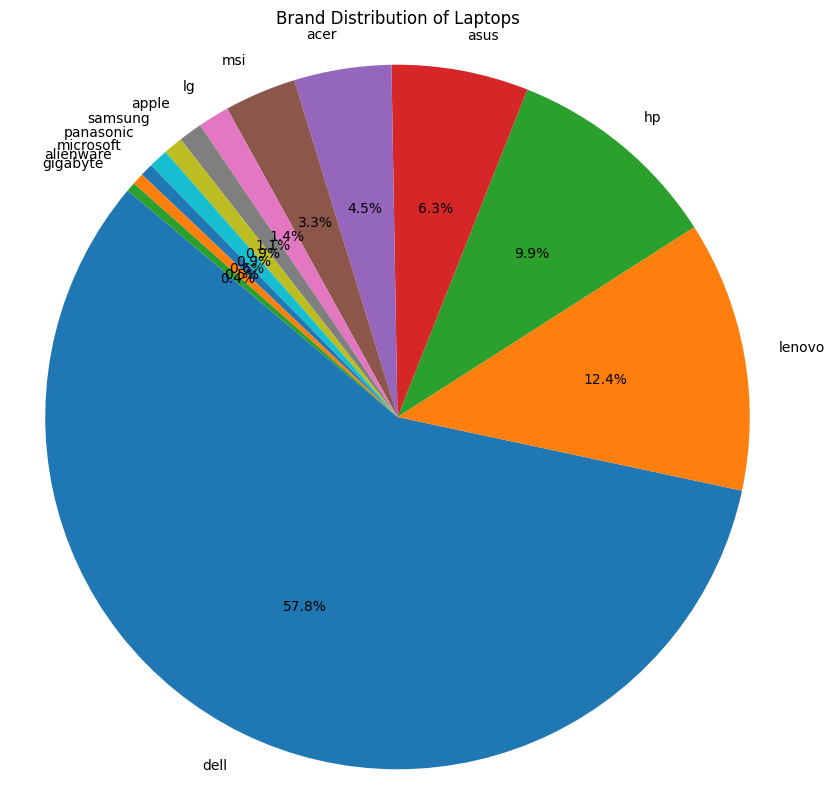

In [ ]:
# Pie chart for Brand Distribution
brand_counts = df['brand'].value_counts()
plt.figure(figsize=(10, 10))
plt.pie(brand_counts, labels=brand_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Brand Distribution of Laptops')
plt.axis('equal')
plt.show()


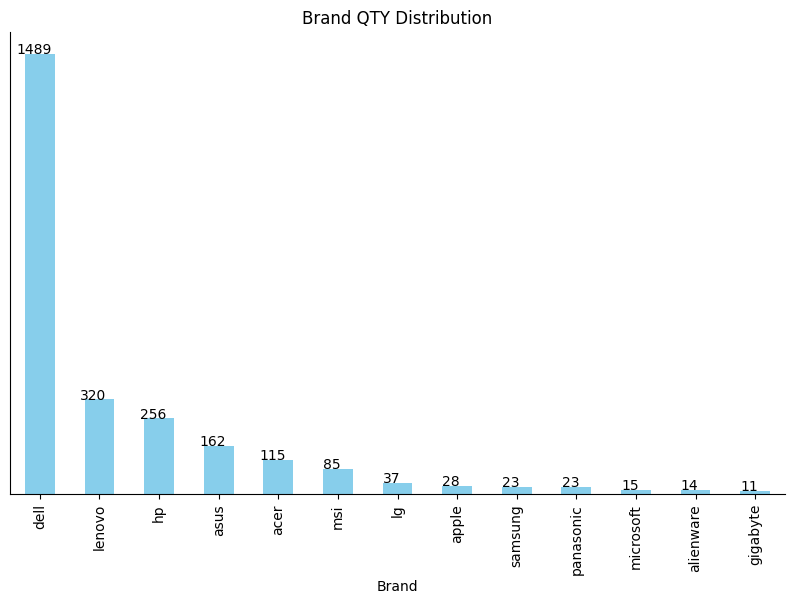

In [ ]:
brand_counts = df['brand'].value_counts().head(13)
brand_counts = brand_counts.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
bars = brand_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Brand')
plt.ylabel('Frequency')
plt.title('Brand QTY Distribution')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().get_yaxis().set_visible(False)

for bar in bars.patches:
    plt.text(
        bar.get_x() + bar.get_width() / 2 - 0.1,
        bar.get_height() + 0.5,
        int(bar.get_height()),
        ha='center',
        color='black',
    )

plt.show()

Price Distribution

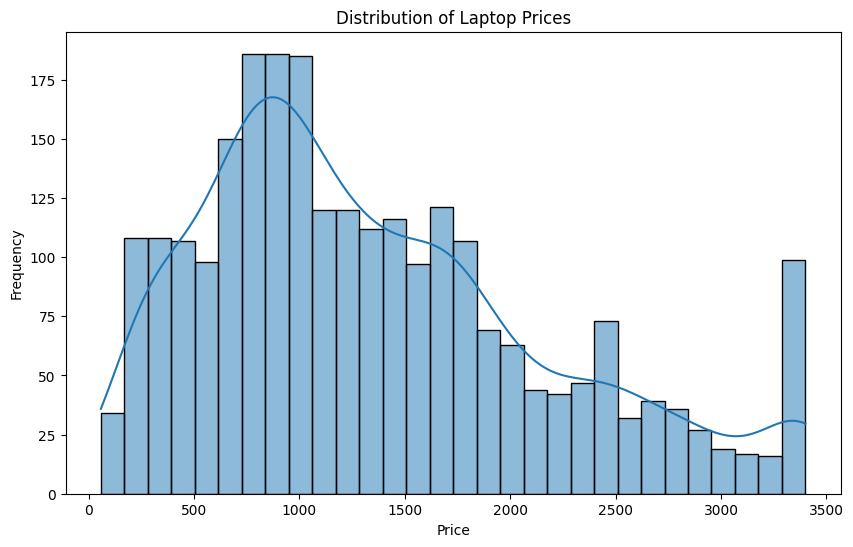

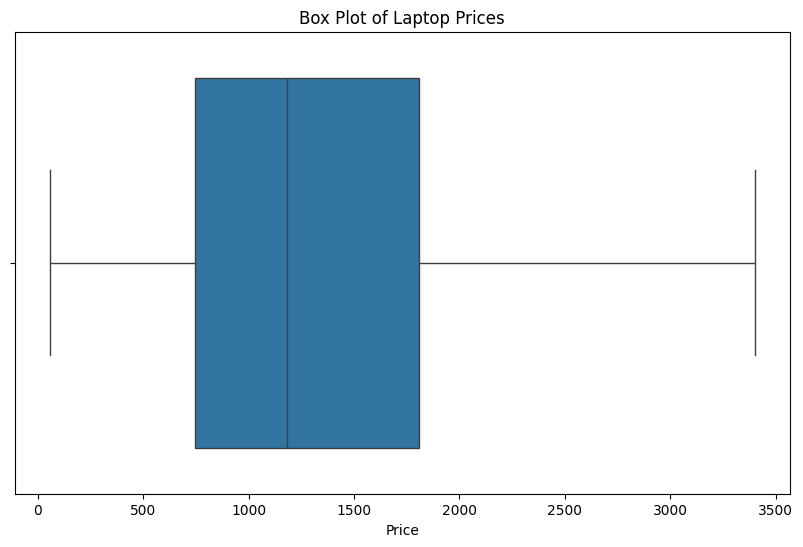

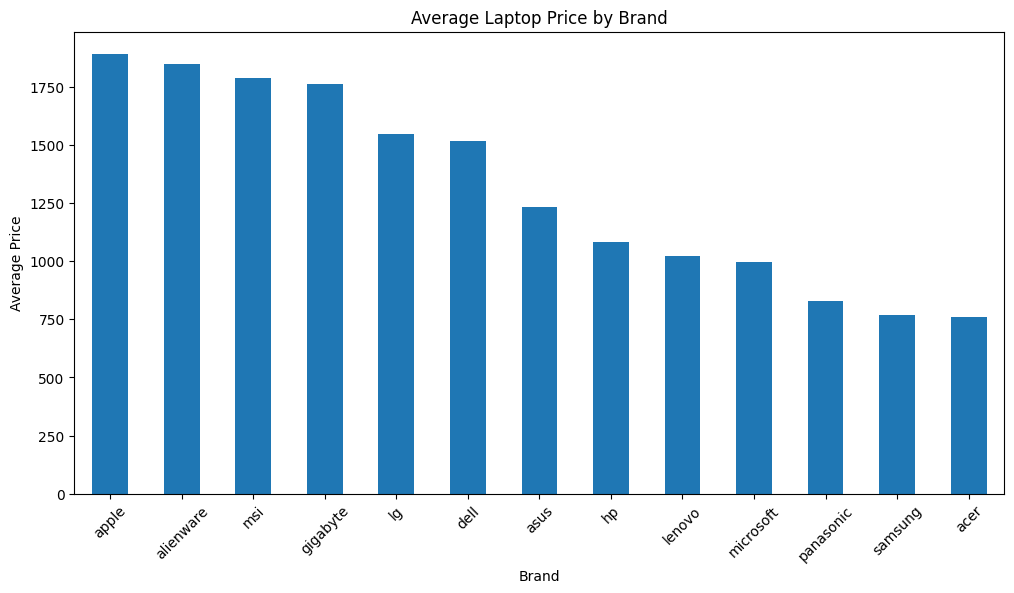

In [ ]:
# Histogram for Price
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=30, kde=True)
plt.title('Distribution of Laptop Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


# Box plot for Price
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['price'])
plt.title('Box Plot of Laptop Prices')
plt.xlabel('Price')
plt.show()

# Average price by brand
average_price_by_brand = df.groupby('brand')['price'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
average_price_by_brand.plot(kind='bar')
plt.title('Average Laptop Price by Brand')
plt.xlabel('Brand')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

****

Average Least and Most Expensive Brands

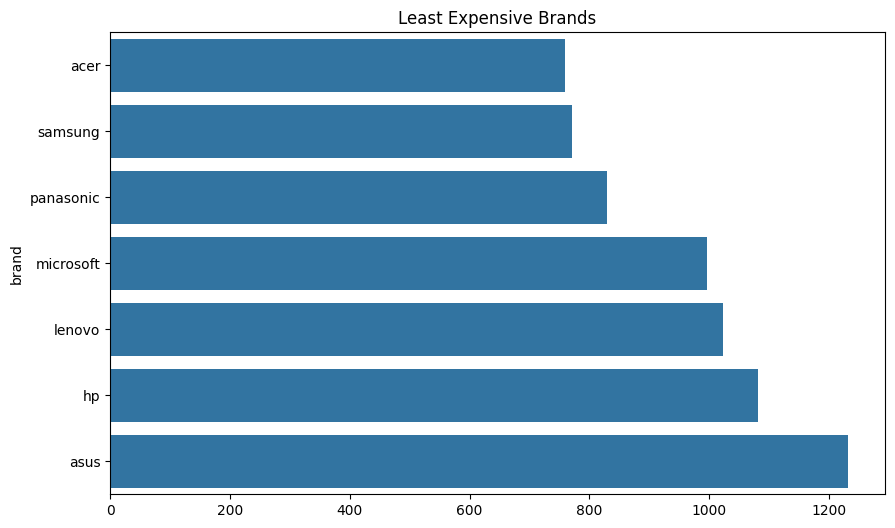

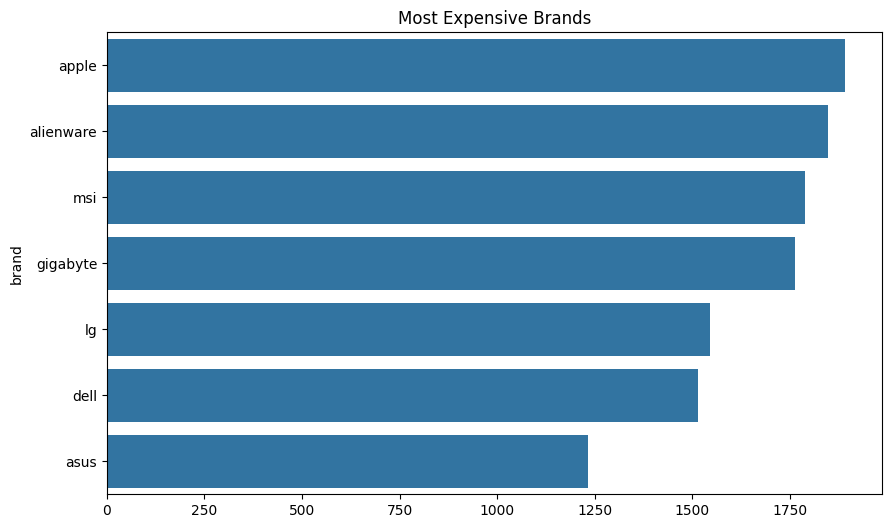

In [ ]:
#average least expensive brands
temp = df.groupby('brand').price.mean()
temp2 = temp.sort_values(ascending=True)[:7]
plt.figure(figsize=(10,6))
plt.title('Least Expensive Brands')
sns.barplot(y=temp2.index,x=temp2.values);


#average most expensive brands
temp = df.groupby('brand').price.mean()
temp2 = temp.sort_values(ascending=False)[:7]
plt.figure(figsize=(10,6))
plt.title('Most Expensive Brands')
sns.barplot(y=temp2.index,x=temp2.values);

Average brand rating based on customer reviews

In [ ]:
brand_avg_rate = df.groupby('brand')['rating'].mean().reset_index()

brand_avg_rate = brand_avg_rate.sort_values(by='rating', ascending=False)
brand_avg_rate

,brand,rating
4,dell,4.811148
10,msi,4.616471
6,hp,4.523438
8,lg,4.505405
2,apple,4.500000
9,microsoft,4.493333
11,panasonic,4.439130
0,acer,4.434783
7,lenovo,4.430000
12,samsung,4.347826


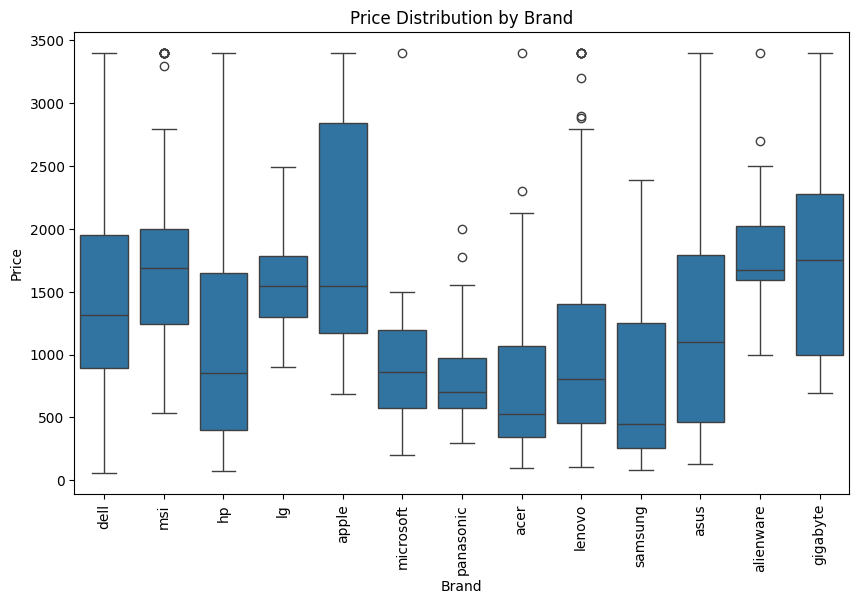

In [ ]:
brands_in_order = brand_avg_rate['brand'].tolist()
plt.show()
plt.figure(figsize=(10, 6))
sns.boxplot(x='brand', y='price', data=df, order=brands_in_order)
plt.xlabel('Brand')
plt.ylabel('Price')
plt.title('Price Distribution by Brand')
plt.xticks(rotation=90)
plt.show()

**Overall Analysis**

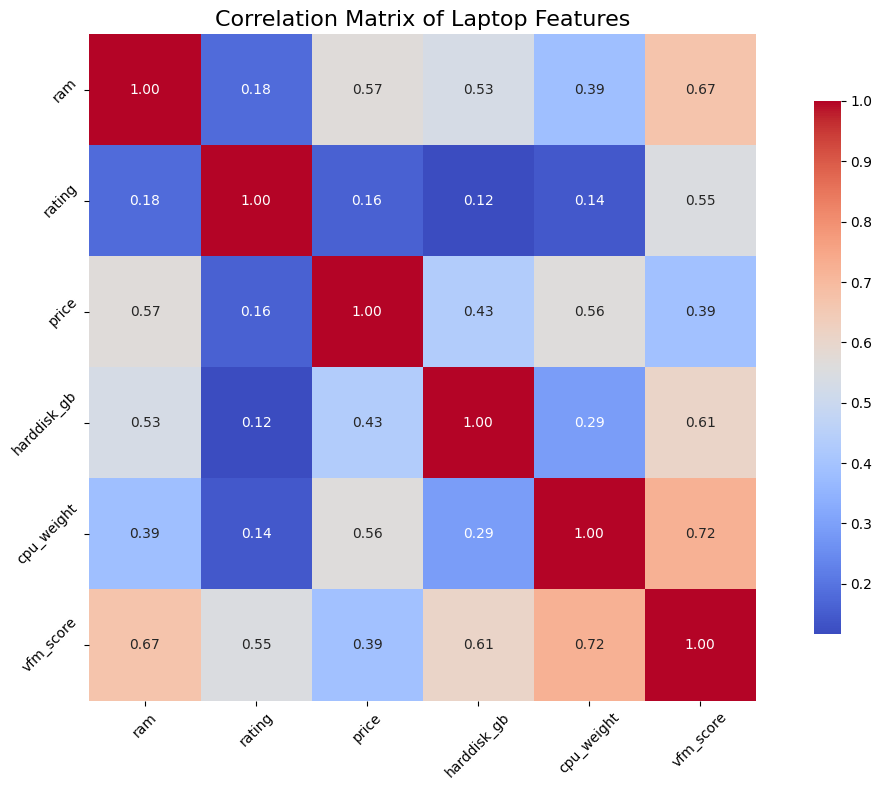

In [ ]:
numerical_features = df.select_dtypes(include=['number'])

# Droping the specified normalized columns
columns_to_drop = ['normalized_price', 'normalized_ram', 'normalized_rating', 'normalized_harddisk', 'normalized_vfm_score', 'scaled_vfm_score']
numerical_features = numerical_features.drop(columns=columns_to_drop, errors='ignore')


correlation_matrix = numerical_features.corr()
plt.figure(figsize=(12, 8))

sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

plt.title('Correlation Matrix of Laptop Features', fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()


VFM EDA

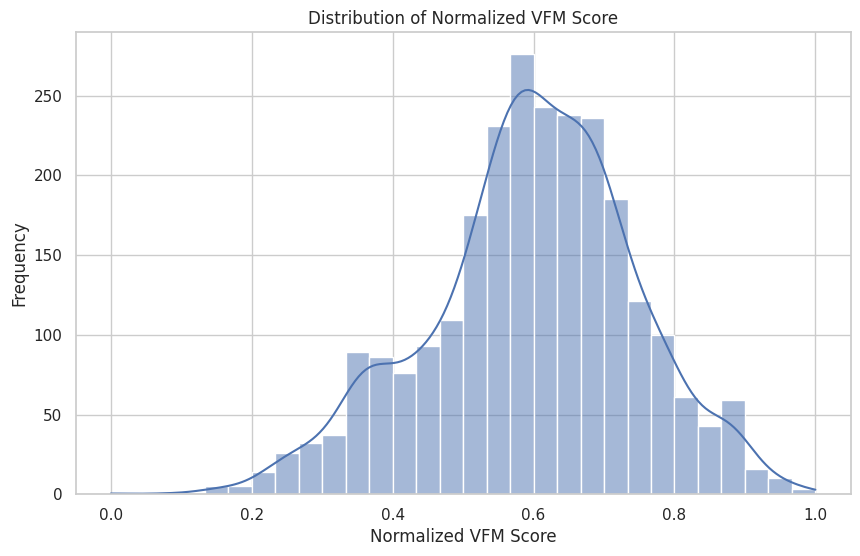

In [ ]:
# Set the style for seaborn
sns.set(style="whitegrid")

# Univariate Analysis: Distribution of VFM Score
plt.figure(figsize=(10, 6))
sns.histplot(df['normalized_vfm_score'], bins=30, kde=True)
plt.title('Distribution of Normalized VFM Score')
plt.xlabel('Normalized VFM Score')
plt.ylabel('Frequency')
plt.show()

Summary Statistics for VFM Score:
count    2571.000000
mean        0.711876
std         0.122982
min         0.214416
25%         0.643370
50%         0.718277
75%         0.793063
max         1.047956
Name: vfm_score, dtype: float64
count    2571.000000
mean        0.596804
std         0.147542
min         0.000000
25%         0.514617
50%         0.604484
75%         0.694204
max         1.000000
Name: normalized_vfm_score, dtype: float64


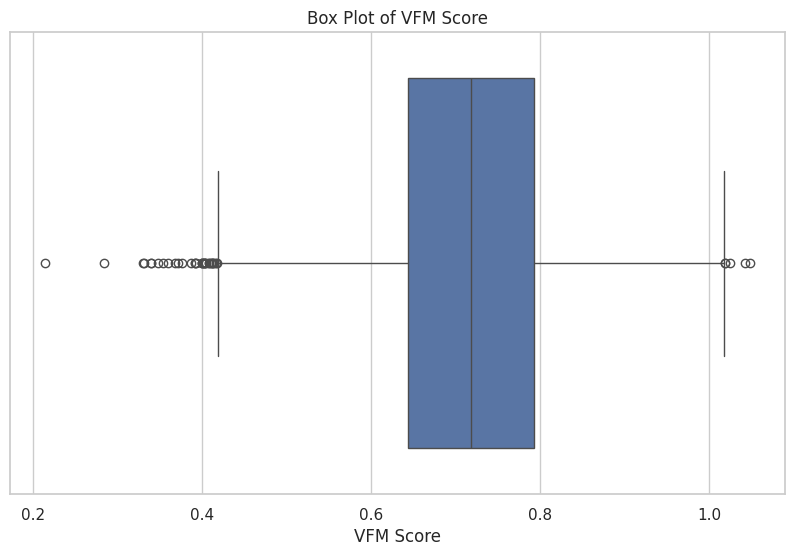

In [ ]:
# Summary Statistics for VFM Score
print("Summary Statistics for VFM Score:")
print(df['vfm_score'].describe())

print(df['normalized_vfm_score'].describe())

# Box Plot of VFM Score
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['vfm_score'])
plt.title('Box Plot of VFM Score')
plt.xlabel('VFM Score')
plt.show()

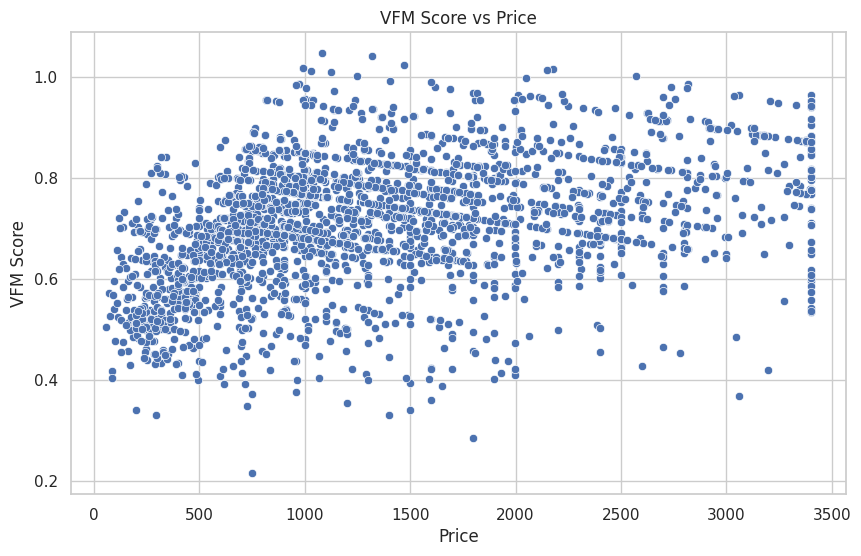

In [ ]:
# Bivariate Analysis: VFM Score vs Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='price', y='vfm_score', data=df)
plt.title('VFM Score vs Price')
plt.xlabel('Price')
plt.ylabel('VFM Score')
plt.show()

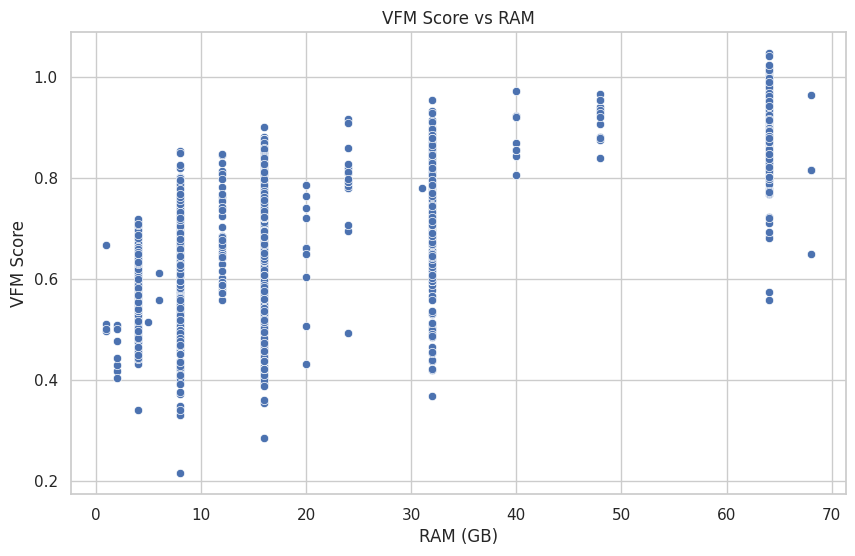

In [ ]:
# Bivariate Analysis: VFM Score vs RAM
plt.figure(figsize=(10, 6))
sns.scatterplot(x='ram', y='vfm_score', data=df)
plt.title('VFM Score vs RAM')
plt.xlabel('RAM (GB)')
plt.ylabel('VFM Score')
plt.show()

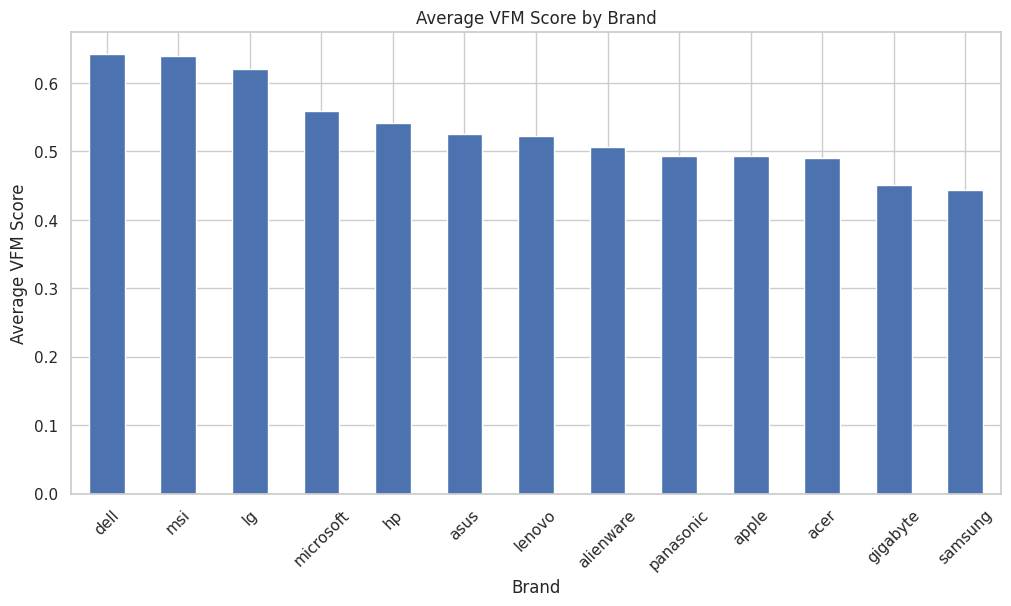

In [ ]:
# Group Analysis: Average VFM Score by Brand
average_vfm_by_brand = df.groupby('brand')['normalized_vfm_score'].mean().sort_values(ascending=False)

# Bar Plot for Average VFM Score by Brand
plt.figure(figsize=(12, 6))
average_vfm_by_brand.plot(kind='bar')
plt.title('Average VFM Score by Brand')
plt.xlabel('Brand')
plt.ylabel('Average VFM Score')
plt.xticks(rotation=45)
plt.show()

**User Recommendation**

> We scale the vfm score on the scale 1 to 10, which is more easily interpretable.

> The user is asked to enter their minimum and maximum budget
> According to the vfm rating top 10 laptop will be displayed for the user to choose from.

In [ ]:
def min_max_scaling(series, new_min=1, new_max=10):
    min_val = series.min()
    max_val = series.max()
    scaled_series = ((series - min_val) / (max_val - min_val)) * (new_max - new_min) + new_min
    return scaled_series

df['scaled_vfm_score'] = min_max_scaling(df['vfm_score'])

def recommend_laptops(min_budget, max_budget):
    affordable_laptops = df[(df['price'] >= min_budget) & (df['price'] <= max_budget)]
    recommended_laptops = affordable_laptops.sort_values(by='scaled_vfm_score', ascending=False)

    # Return top 10 laptops with the scaled VFM score
    return recommended_laptops[['brand', 'model', 'price', 'ram', 'harddisk', 'cpu', 'screen_size', 'rating', 'scaled_vfm_score', 'special_features']].head(10)

def main():
    try:
        min_budget = float(input("Enter your minimum budget for a laptop: $"))
        max_budget = float(input("Enter your maximum budget for a laptop: $"))
        recommendations = recommend_laptops(min_budget, max_budget)

        if recommendations.empty:
            print("No laptops found within your budget range.")
        else:
            print("\nRecommended Laptops:\n")
            formatted_recommendations = recommendations.copy()
            formatted_recommendations['price'] = formatted_recommendations['price'].map('${:,.2f}'.format)
            formatted_recommendations['scaled_vfm_score'] = formatted_recommendations['scaled_vfm_score'].map('{:.2f}'.format)

            print(formatted_recommendations.to_string(index=False))
    except ValueError:
        print("Please enter valid numerical budgets.")

if __name__ == "__main__":
    main()


Enter your minimum budget for a laptop: $1500
Enter your maximum budget for a laptop: $2000

Recommended Laptops:

brand                model     price  ram harddisk           cpu screen_size  rating scaled_vfm_score                                                 special_features
   hp          Pavilion 15 $1,599.00 64.0     4 TB Intel Core i7 15.6 Inches     5.0             9.38   Fingerprint Reader, HD Audio, Backlit Keyboard, Numeric Keypad
 dell        Latitude 5410 $1,616.96 64.0     2 TB Intel Core i7   14 Inches     5.0             9.28                                                              NaN
 dell             Inspiron $1,689.99 64.0     2 TB Intel Core i7   14 Inches     5.0             9.23                                      Anti-glare,Backlit Keyboard
 dell            Precision $1,799.81 64.0     2 TB Intel Core i7 15.6 Inches     5.0             9.16                              Backlit Keyboard,Fingerprint Reader
 acer        Nitro 5 AN515 $1,819.00 64.0     2 TB

List Of Recommended Laptops to CSV file

In [ ]:
file_path = 'recommended_laptops_list.csv'
df.to_csv(file_path, index=False)
print(f"DataFrame saved to {file_path}")

DataFrame saved to recommended_laptops_list.csv


Final Cleaned dataframe to CSV file

In [ ]:
file_path = 'final_cleaned_laptop_data.csv'
df.to_csv(file_path, index=False)
print(f"DataFrame saved to {file_path}")

DataFrame saved to final_cleaned_laptop_data.csv


**Descriptive Analysis**

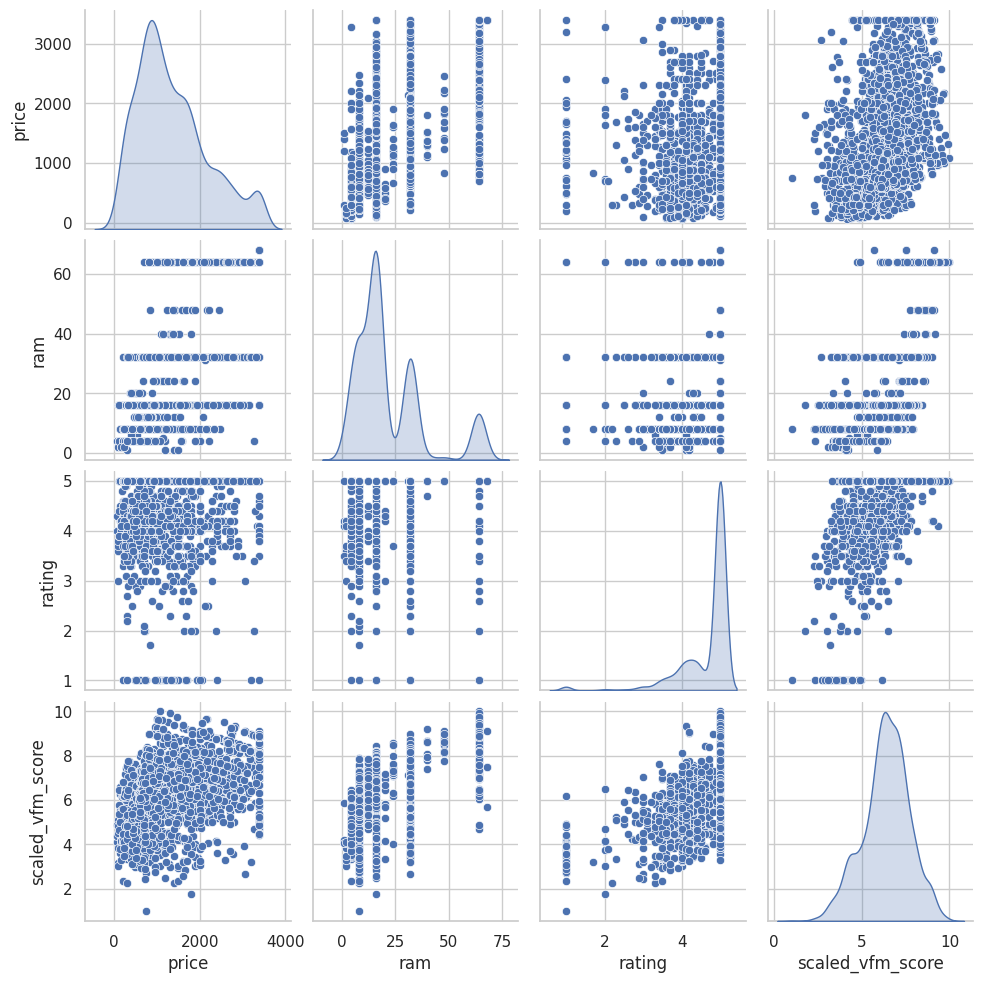

In [ ]:
# Pair Plot
sns.pairplot(df[['price', 'ram', 'rating', 'scaled_vfm_score']], diag_kind='kde')
plt.show()

### Data Visualization and Analysis in the Laptop Market

In the rapidly evolving laptop market, informed decision-making relies on understanding consumer preferences, product specifications, and pricing dynamics. This project utilizes data visualization to extract insights from a dataset of various laptop specifications and prices. Through descriptive analysis, we aim to reveal key relationships and identify trends to enhance market strategies.

1. **Understanding Correlations**  
   Our analysis explores correlations between independent variables like RAM, CPU type, hard disk capacity, and price. A correlation matrix visually represents these relationships, helping to identify features that significantly influence pricing and consumer preferences. For example, a positive correlation between RAM size and price can guide manufacturers on consumer demand for higher specifications.

2. **Frequency Analysis**  
   Analyzing purchase frequencies sheds light on consumer behavior. By examining sales of specific laptop models and peak purchasing times, we can tailor marketing strategies effectively. Visualization tools like bar charts and line graphs illustrate these patterns, aiding in demand forecasting and resource allocation.

### Conclusion

In summary, our analysis highlights the importance of data visualization and descriptive analysis in understanding the laptop market. By investigating correlations among key features, we have clarified how they impact pricing and consumer choices.

The insights from our correlation matrix emphasize the relevance of specific specifications in driving market demand, enabling manufacturers to align products with consumer expectations. Additionally, frequency analysis reveals popular models and optimal marketing times, providing valuable direction for stakeholders.

Moving forward, leveraging these insights will be crucial for enhancing competitive positioning in the laptop market. Data-driven strategies will allow manufacturers and retailers to better address consumer needs, optimize inventory, and drive sales growth. This project illustrates the power of data visualization in uncovering actionable insights and underscores the necessity for ongoing analysis in this dynamic industry.

**PART-2**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

df_cleaned = pd.read_csv('final_cleaned_laptop_data.csv')
print(df_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2578 entries, 0 to 2577
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   brand                 2578 non-null   object 
 1   model                 2578 non-null   object 
 2   screen_size           2578 non-null   object 
 3   color                 2578 non-null   object 
 4   harddisk              2578 non-null   object 
 5   cpu                   2578 non-null   object 
 6   ram                   2578 non-null   float64
 7   OS                    2578 non-null   object 
 8   special_features      1704 non-null   object 
 9   graphics              2578 non-null   object 
 10  graphics_coprocessor  1013 non-null   object 
 11  cpu_speed             2578 non-null   object 
 12  rating                2578 non-null   float64
 13  price                 2578 non-null   float64
 14  harddisk_gb           2571 non-null   float64
 15  cpu_weight           

In [ ]:
df_cleaned.isnull().sum()

,0
brand,0
model,0
screen_size,0
color,0
harddisk,0
cpu,0
ram,0
OS,0
special_features,874
graphics,0


In [ ]:
df_cleaned['harddisk_gb'] = df_cleaned['harddisk_gb'].fillna(df_cleaned['harddisk_gb'].mode()[0])
df_cleaned['normalized_harddisk'] = df_cleaned['normalized_harddisk'].fillna(df_cleaned['normalized_harddisk'].mode()[0])
df_cleaned['vfm_score'] = df_cleaned['vfm_score'].fillna(df_cleaned['vfm_score'].mode()[0])
df_cleaned['normalized_vfm_score'] = df_cleaned['normalized_vfm_score'].fillna(df_cleaned['normalized_vfm_score'].mode()[0])
df_cleaned.isnull().sum()

,0
brand,0
model,0
screen_size,0
color,0
harddisk,0
cpu,0
ram,0
OS,0
special_features,874
graphics,0


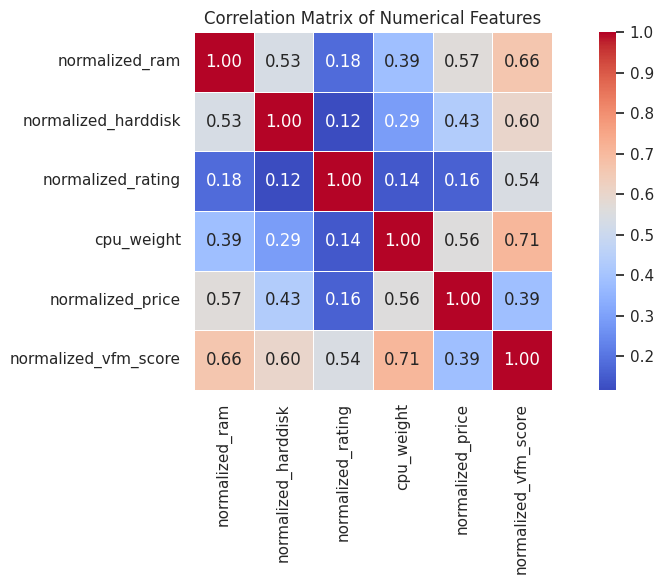

In [ ]:
# Select the relevant numerical columns
numerical_columns = ['normalized_ram', 'normalized_harddisk', 'normalized_rating',
                     'cpu_weight', 'normalized_price', 'normalized_vfm_score']

# Create a correlation matrix for the selected columns
correlation_matrix = df_cleaned[numerical_columns].corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5, square=True)
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

Now We will Use the Features in the correaltion matrix to predict prices

# Linear Regressor

Top Features Selected by RFE: Index(['normalized_ram', 'normalized_harddisk', 'normalized_rating',
       'cpu_weight', 'normalized_vfm_score'],
      dtype='object')


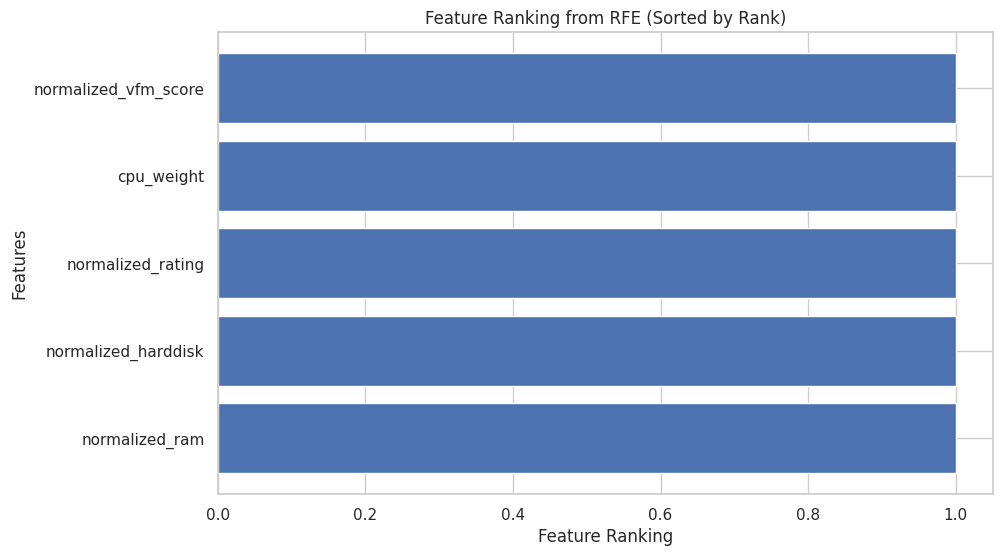

Test Set R²: 0.9277252680095878
Test Set MAE: 143.54138675827372
Test Set MSE: 51647.60324065509
Test Set RMSE: 227.26109046789134


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

X = df_cleaned[['normalized_ram', 'normalized_harddisk', 'normalized_rating', 'cpu_weight', 'normalized_vfm_score']]
y = df_cleaned['price']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize Linear Regression model
linear_model = LinearRegression()

# Perform Recursive Feature Elimination (RFE)
rfe = RFE(estimator=linear_model, n_features_to_select=5)
rfe.fit(X_train, y_train)

# Extract the selected features
selected_features = X_train.columns[rfe.support_]
print("Top Features Selected by RFE:", selected_features)

# Visualize the feature ranking (sorted by ranking)
ranking_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Ranking': rfe.ranking_
})
ranking_df = ranking_df.sort_values(by='Ranking')

plt.figure(figsize=(10, 6))
plt.barh(ranking_df['Feature'], ranking_df['Ranking'])
plt.xlabel('Feature Ranking')
plt.ylabel('Features')
plt.title('Feature Ranking from RFE (Sorted by Rank)')
plt.show()

# Train the Linear Regression model with selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Train the Linear Regression model
linear_model.fit(X_train_selected, y_train)

# Evaluate the model on test set
y_test_pred = linear_model.predict(X_test_selected)
r2_test = r2_score(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test) # Calculate RMSE manually

print(f"Test Set R²: {r2_test}")
print(f"Test Set MAE: {mae_test}")
print(f"Test Set MSE: {mse_test}")
print(f"Test Set RMSE: {rmse_test}")

**Prediction Example Using Linear Regressor Model**

In [ ]:
import numpy as np
import joblib
import pandas as pd

# Load the saved scalers
scaler_vfm = joblib.load('scaler_vfm.pkl')
scaler_ram = joblib.load('scaler_ram.pkl')
scaler_harddisk = joblib.load('scaler_harddisk.pkl')
scaler_rating = joblib.load('scaler_rating.pkl')

# Extract unique values for features
unique_ram_values = df_cleaned['ram'].unique()
unique_harddisk_values = df_cleaned['harddisk_gb'].dropna().unique()
unique_rating_values = df_cleaned['rating'].unique()
unique_cpu_values = df_cleaned['cpu'].unique()

# CPU weight dictionary
cpu_weight_dict = {
    'Intel Core i3': 0.3,
    'Intel Core i5': 0.5,
    'Intel Core i7': 0.7,
    'Intel Core i9': 0.9,
    'Ryzen 3': 0.4,
    'Ryzen 5': 0.6,
    'Ryzen 7': 0.8,
    'Ryzen 9': 1.0,
    'Celeron': 0.2,
    'Pentium': 0.3,
    'MediaTek MT8183': 0.2,
    'MediaTek_MT8127': 0.2,
    'ARM 7100': 0.2,
    'Apple M1': 0.8,
    'Apple M2 Max': 0.9,
    'AMD A Series': 0.4,
    'Core 2 Duo': 0.3,
    'Intel Xeon': 0.8,
    'Others': 0.1,
    'Snapdragon': 0.3,
    'Unknown': 0.5
}

def predict_price():
    print("Enter the following details to predict the laptop price:")

    # RAM
    print("\nAvailable RAM options:", ', '.join(map(str, unique_ram_values)))
    selected_ram = float(input("Enter RAM in GB (e.g., '8'): "))
    normalized_ram = scaler_ram.transform([[selected_ram]])[0][0]  # Normalize using saved scaler

    # Harddisk
    print("\nAvailable Harddisk size options:", ', '.join(map(str, unique_harddisk_values)))
    selected_harddisk = float(input("Enter Harddisk size in GB (e.g., '512'): "))
    normalized_harddisk = scaler_harddisk.transform([[selected_harddisk]])[0][0]  # Normalize using saved scaler

    # Rating
    print("\nAvailable Rating options:", ', '.join(map(str, unique_rating_values)))
    selected_rating = float(input("Enter Rating (e.g., '4.5'): "))
    normalized_rating = scaler_rating.transform([[selected_rating]])[0][0]  # Normalize using saved scaler

    # Displaying the possible values for CPU weight and ask the user to select one
    print("\nAvailable CPU weight options:")
    for cpu, normalized in cpu_weight_dict.items():
        print(f"{cpu}: Normalized Value: {normalized}")
    selected_cpu_weight = input("Enter CPU option (e.g., 'Intel Core i7'): ")
    normalized_cpu_weight = cpu_weight_dict[selected_cpu_weight]

    # Enter the value-for-money score scaled from 1 to 10
    selected_vfm_score_scaled = float(input("Enter Value-for-Money (VFM) score on a scale of 1 to 10 (e.g., '7.5'): "))

    # De-scale the VFM score from [1, 10] to the original range before normalization
    min_vfm = df['vfm_score'].min()
    max_vfm = df['vfm_score'].max()
    selected_vfm_score = (selected_vfm_score_scaled - 1) / 9 * (max_vfm - min_vfm) + min_vfm
    print("vfm: ", selected_vfm_score)
    # De-scale the VFM score to original range (1-100) before normalization
    selected_vfm_score = (selected_vfm_score_scaled - 1) / 9 * (df['vfm_score'].max() - df['vfm_score'].min()) + df['vfm_score'].min()
    normalized_vfm_score = scaler_vfm.transform([[selected_vfm_score]])[0][0]  # Normalize using the saved scaler after de-scaling  # Normalize using saved scaler
    print("normalized_vfm: ", normalized_vfm_score)

    # Create the normalized input array
    input_data = np.array([[normalized_ram, normalized_harddisk, normalized_rating,
                            normalized_cpu_weight, normalized_vfm_score]])

    # Apply RFE transformation to the input data
    input_data_rfe = rfe.transform(input_data)

    # Predict the price using the linear regressor model
    predicted_price = linear_model.predict(input_data_rfe)

    # prediction
    print(f"\nThe predicted laptop price is: ${predicted_price[0]:,.2f}")


predict_price()

Enter the following details to predict the laptop price:

Available RAM options: 8.0, 64.0, 32.0, 4.0, 16.0, 20.0, 12.0, 40.0, 68.0, 1.0, 2.0, 48.0, 24.0, 5.0, 6.0, 31.0
Enter RAM in GB (e.g., '8'): 8

Available Harddisk size options: 1000.0, 256.0, 128.0, 64.0, 512.0, 1024.0, 1152.0, 2048.0, 32.0, 16.0, 2176.0, 240.0, 65.0, 300.0, 320.0, 2000.0, 480.0, 500.0, 250.0, 160.0, 8.0, 1256.0, 1512.0, 1966.0, 1536.0, 640.0
Enter Harddisk size in GB (e.g., '512'): 1000


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(



Available Rating options: 5.0, 4.5, 4.8, 4.7, 4.4, 4.3, 4.2, 4.6, 1.0, 3.8, 4.1, 4.0, 3.7, 3.9, 3.5, 3.0, 2.5, 2.8, 2.9, 3.4, 3.6, 3.3, 4.9, 2.3, 2.0, 3.1, 1.7, 2.7, 2.6, 2.1, 3.2, 2.2
Enter Rating (e.g., '4.5'): 5


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(



Available CPU weight options:
Intel Core i3: Normalized Value: 0.3
Intel Core i5: Normalized Value: 0.5
Intel Core i7: Normalized Value: 0.7
Intel Core i9: Normalized Value: 0.9
Ryzen 3: Normalized Value: 0.4
Ryzen 5: Normalized Value: 0.6
Ryzen 7: Normalized Value: 0.8
Ryzen 9: Normalized Value: 1.0
Celeron: Normalized Value: 0.2
Pentium: Normalized Value: 0.3
MediaTek MT8183: Normalized Value: 0.2
MediaTek_MT8127: Normalized Value: 0.2
ARM 7100: Normalized Value: 0.2
Apple M1: Normalized Value: 0.8
Apple M2 Max: Normalized Value: 0.9
AMD A Series: Normalized Value: 0.4
Core 2 Duo: Normalized Value: 0.3
Intel Xeon: Normalized Value: 0.8
Others: Normalized Value: 0.1
Snapdragon: Normalized Value: 0.3
Unknown: Normalized Value: 0.5
Enter CPU option (e.g., 'Intel Core i7'): Intel Core i7
Enter Value-for-Money (VFM) score on a scale of 1 to 10 (e.g., '7.5'): 7.3518
vfm:  0.8026914302449735
normalized_vfm:  0.7057555555555557

The predicted laptop price is: $806.41


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RFE was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
predicted_price = 806.41
actual_price = 589.99

# absolute percentage error
percentage_error = abs((predicted_price - actual_price) / actual_price) * 100
print(f"The absolute percentage error is: {percentage_error:.2f}%")

The absolute percentage error is: 36.68%


# Random Forest Regressor

Top Features Selected by RFE: Index(['normalized_ram', 'normalized_harddisk', 'normalized_rating',
       'cpu_weight', 'normalized_vfm_score'],
      dtype='object')


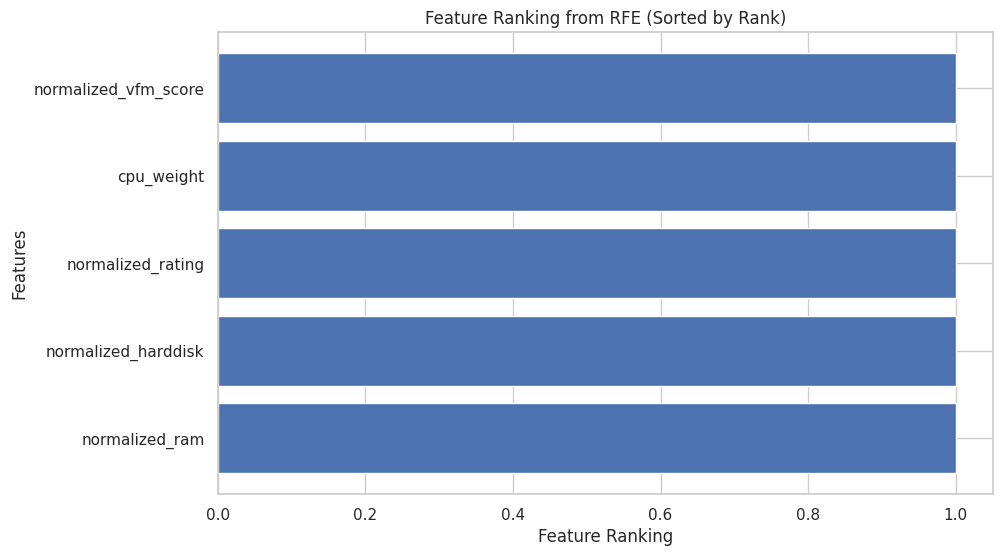

Test Set R²: 0.9182597605922798
Test Set MAE: 138.10506625726157
Test Set MSE: 58411.66528692394
Test Set RMSE: 241.68505391712566


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Define features and target(y)
X = df_cleaned[['normalized_ram', 'normalized_harddisk', 'normalized_rating', 'cpu_weight', 'normalized_vfm_score']]
y = df_cleaned['price']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Perform Recursive Feature Elimination (RFE)
rfe = RFE(estimator=rf_model, n_features_to_select=5)
rfe.fit(X_train, y_train)

# Extract the selected features
selected_features = X_train.columns[rfe.support_]
print("Top Features Selected by RFE:", selected_features)

# Visualize the feature ranking (sorted by ranking)
ranking_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Ranking': rfe.ranking_
})
ranking_df = ranking_df.sort_values(by='Ranking')

plt.figure(figsize=(10, 6))
plt.barh(ranking_df['Feature'], ranking_df['Ranking'])
plt.xlabel('Feature Ranking')
plt.ylabel('Features')
plt.title('Feature Ranking from RFE (Sorted by Rank)')
plt.show()

# Train the Random Forest model with selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Train the Random Forest Regressor model
rf_model.fit(X_train_selected, y_train)

# Evaluate the model on test set
y_test_pred = rf_model.predict(X_test_selected)
r2_test = r2_score(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)

print(f"Test Set R²: {r2_test}")
print(f"Test Set MAE: {mae_test}")
print(f"Test Set MSE: {mse_test}")
print(f"Test Set RMSE: {rmse_test}")

**Prediction Example Using Random Forest Model**

In [ ]:
import numpy as np
import joblib
import pandas as pd

# Load the saved scalers
scaler_vfm = joblib.load('scaler_vfm.pkl')
scaler_ram = joblib.load('scaler_ram.pkl')
scaler_harddisk = joblib.load('scaler_harddisk.pkl')
scaler_rating = joblib.load('scaler_rating.pkl')

# Extract unique values for features
unique_ram_values = df_cleaned['ram'].unique()
unique_harddisk_values = df_cleaned['harddisk_gb'].dropna().unique()
unique_rating_values = df_cleaned['rating'].unique()
unique_cpu_values = df_cleaned['cpu'].unique()

# CPU weight dictionary
cpu_weight_dict = {
    'Intel Core i3': 0.3,
    'Intel Core i5': 0.5,
    'Intel Core i7': 0.7,
    'Intel Core i9': 0.9,
    'Ryzen 3': 0.4,
    'Ryzen 5': 0.6,
    'Ryzen 7': 0.8,
    'Ryzen 9': 1.0,
    'Celeron': 0.2,
    'Pentium': 0.3,
    'MediaTek MT8183': 0.2,
    'MediaTek_MT8127': 0.2,
    'ARM 7100': 0.2,
    'Apple M1': 0.8,
    'Apple M2 Max': 0.9,
    'AMD A Series': 0.4,
    'Core 2 Duo': 0.3,
    'Intel Xeon': 0.8,
    'Others': 0.1,
    'Snapdragon': 0.3,
    'Unknown': 0.5
}

def predict_price():
    print("Enter the following details to predict the laptop price:")

    # RAM
    print("\nAvailable RAM options:", ', '.join(map(str, unique_ram_values)))
    selected_ram = float(input("Enter RAM in GB (e.g., '8'): "))
    normalized_ram = scaler_ram.transform([[selected_ram]])[0][0]  # Normalize using saved scaler

    # Harddisk
    print("\nAvailable Harddisk size options:", ', '.join(map(str, unique_harddisk_values)))
    selected_harddisk = float(input("Enter Harddisk size in GB (e.g., '512'): "))
    normalized_harddisk = scaler_harddisk.transform([[selected_harddisk]])[0][0]  # Normalize using saved scaler

    # Rating
    print("\nAvailable Rating options:", ', '.join(map(str, unique_rating_values)))
    selected_rating = float(input("Enter Rating (e.g., '4.5'): "))
    normalized_rating = scaler_rating.transform([[selected_rating]])[0][0]  # Normalize using saved scaler

    # Displaying the possible values for CPU weight and ask the user to select one
    print("\nAvailable CPU weight options:")
    for cpu, normalized in cpu_weight_dict.items():
        print(f"{cpu}: Normalized Value: {normalized}")
    selected_cpu_weight = input("Enter CPU option (e.g., 'Intel Core i7'): ")
    normalized_cpu_weight = cpu_weight_dict[selected_cpu_weight]

    # Enter the value-for-money score scaled from 1 to 10
    selected_vfm_score_scaled = float(input("Enter Value-for-Money (VFM) score on a scale of 1 to 10 (e.g., '7.5'): "))

    # De-scale the VFM score from [1, 10] to the original range before normalization
    min_vfm = df['vfm_score'].min()
    max_vfm = df['vfm_score'].max()
    selected_vfm_score = (selected_vfm_score_scaled - 1) / 9 * (max_vfm - min_vfm) + min_vfm
    print("vfm: ", selected_vfm_score)
    # De-scale the VFM score to original range (1-100) before normalization
    selected_vfm_score = (selected_vfm_score_scaled - 1) / 9 * (df['vfm_score'].max() - df['vfm_score'].min()) + df['vfm_score'].min()
    normalized_vfm_score = scaler_vfm.transform([[selected_vfm_score]])[0][0]  # Normalize using the saved scaler after de-scaling  # Normalize using saved scaler
    print("normalized_vfm: ", normalized_vfm_score)

    # Create the normalized input array
    input_data = np.array([[normalized_ram, normalized_harddisk, normalized_rating,
                            normalized_cpu_weight, normalized_vfm_score]])

    # Apply RFE transformation to the input data
    input_data_rfe = rfe.transform(input_data)
    # Predict the price using the random forest model
    predicted_price = rf_model.predict(input_data_rfe)
    print(f"\nThe predicted laptop price is: ${predicted_price[0]:,.2f}")


predict_price()


Enter the following details to predict the laptop price:

Available RAM options: 8.0, 64.0, 32.0, 4.0, 16.0, 20.0, 12.0, 40.0, 68.0, 1.0, 2.0, 48.0, 24.0, 5.0, 6.0, 31.0
Enter RAM in GB (e.g., '8'): 8


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(



Available Harddisk size options: 1000.0, 256.0, 128.0, 64.0, 512.0, 1024.0, 1152.0, 2048.0, 32.0, 16.0, 2176.0, 240.0, 65.0, 300.0, 320.0, 2000.0, 480.0, 500.0, 250.0, 160.0, 8.0, 1256.0, 1512.0, 1966.0, 1536.0, 640.0
Enter Harddisk size in GB (e.g., '512'): 1000


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(



Available Rating options: 5.0, 4.5, 4.8, 4.7, 4.4, 4.3, 4.2, 4.6, 1.0, 3.8, 4.1, 4.0, 3.7, 3.9, 3.5, 3.0, 2.5, 2.8, 2.9, 3.4, 3.6, 3.3, 4.9, 2.3, 2.0, 3.1, 1.7, 2.7, 2.6, 2.1, 3.2, 2.2
Enter Rating (e.g., '4.5'): 5


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(



Available CPU weight options:
Intel Core i3: Normalized Value: 0.3
Intel Core i5: Normalized Value: 0.5
Intel Core i7: Normalized Value: 0.7
Intel Core i9: Normalized Value: 0.9
Ryzen 3: Normalized Value: 0.4
Ryzen 5: Normalized Value: 0.6
Ryzen 7: Normalized Value: 0.8
Ryzen 9: Normalized Value: 1.0
Celeron: Normalized Value: 0.2
Pentium: Normalized Value: 0.3
MediaTek MT8183: Normalized Value: 0.2
MediaTek_MT8127: Normalized Value: 0.2
ARM 7100: Normalized Value: 0.2
Apple M1: Normalized Value: 0.8
Apple M2 Max: Normalized Value: 0.9
AMD A Series: Normalized Value: 0.4
Core 2 Duo: Normalized Value: 0.3
Intel Xeon: Normalized Value: 0.8
Others: Normalized Value: 0.1
Snapdragon: Normalized Value: 0.3
Unknown: Normalized Value: 0.5
Enter CPU option (e.g., 'Intel Core i7'): Intel Core i7
Enter Value-for-Money (VFM) score on a scale of 1 to 10 (e.g., '7.5'): 7.3518
vfm:  0.8026914302449735
normalized_vfm:  0.7057555555555557

The predicted laptop price is: $688.86


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RFE was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [ ]:
predicted_price = 688.86
actual_price = 589.99

# absolute percentage error
percentage_error = abs((predicted_price - actual_price) / actual_price) * 100
print(f"The absolute percentage error is: {percentage_error:.2f}%")

The absolute percentage error is: 16.76%



# XGBoost Regressor

**Dimensionality Reduction**

Top 5 Features Selected by RFE: Index(['normalized_ram', 'normalized_harddisk', 'normalized_rating',
       'cpu_weight', 'normalized_vfm_score'],
      dtype='object')


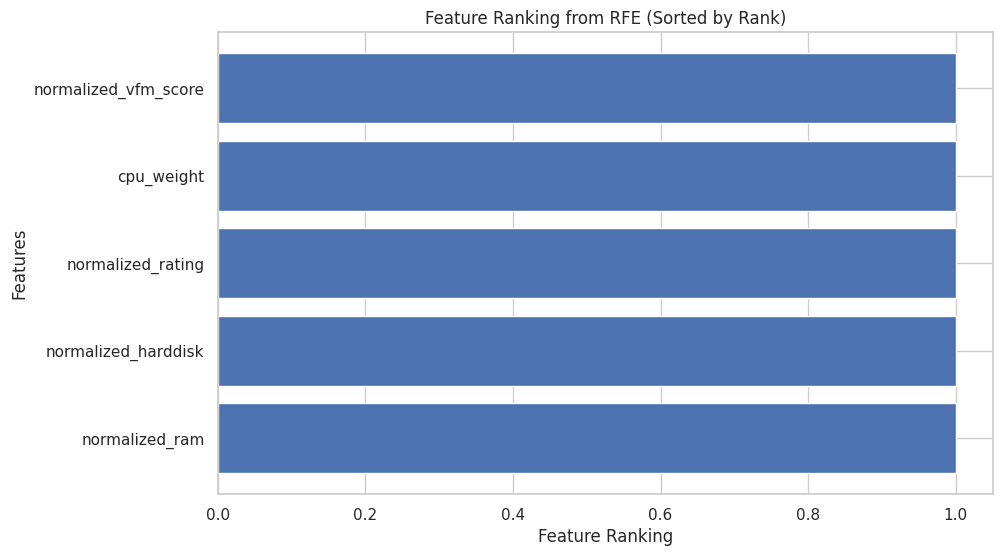

In [ ]:
import pandas as pd
from sklearn.feature_selection import RFE
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

X = df_cleaned[['normalized_ram', 'normalized_harddisk', 'normalized_rating', 'cpu_weight', 'normalized_vfm_score']]  # Features
y = df_cleaned['price']  # Target variable (price)

# Step 1: Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Step 2: Apply RFE using the training data
xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=42)
rfe = RFE(xgb_model, n_features_to_select=5)
X_train_rfe = rfe.fit_transform(X_train, y_train)

# Step 3: Print the top 5 features selected by RFE
selected_features = X_train.columns[rfe.support_]
print(f"Top 5 Features Selected by RFE: {selected_features}")

# Step 4: Visualize the feature ranking (sorted by ranking)
ranking_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Ranking': rfe.ranking_
})
ranking_df = ranking_df.sort_values(by='Ranking')

plt.figure(figsize=(10, 6))
plt.barh(ranking_df['Feature'], ranking_df['Ranking'])
plt.xlabel('Feature Ranking')
plt.ylabel('Features')
plt.title('Feature Ranking from RFE (Sorted by Rank)')
plt.show()

**Machine Learning Modelling & Evaluation**

In [ ]:
# Step 5: Apply RFE-selected features to train the model
X_train_rfe = X_train.iloc[:, rfe.support_]  # Select only the top 5 features
X_val_rfe = X_val.iloc[:, rfe.support_]  # Apply the same transformation on validation data
X_test_rfe = X_test.iloc[:, rfe.support_]  # Apply the same transformation on test data

# Step 6: Train the model using the selected features
xgb_model.fit(X_train_rfe, y_train)

# Step 7: Predict on the validation set
y_val_pred = xgb_model.predict(X_val_rfe)

# Step 8: Evaluate the model on the validation set
r2_val = r2_score(y_val, y_val_pred)
mae_val = mean_absolute_error(y_val, y_val_pred)
mse_val = mean_squared_error(y_val, y_val_pred)
rmse_val = np.sqrt(mse_val)

print(f"Validation Set R²: {r2_val}")
print(f"Validation Set MAE: {mae_val}")
print(f"Validation Set MSE: {mse_val}")
print(f"Validation Set RMSE: {rmse_val}")

# Step 9: Predict on the test set
y_test_pred = xgb_model.predict(X_test_rfe)

# Step 10: Evaluate the model on the test set
r2_test = r2_score(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)

print(f"Test Set R²: {r2_test}")
print(f"Test Set MAE: {mae_test}")
print(f"Test Set MSE: {mse_test}")
print(f"Test Set RMSE: {rmse_test}")

# Step 11: Hyperparameter tuning with GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7]
}

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train_rfe, y_train)

# Best Parameters after GridSearchCV
print(f"Best Parameters from GridSearchCV: {grid_search.best_params_}")

# Step 12: Evaluate the best model from GridSearchCV
best_model = grid_search.best_estimator_
y_test_pred_best = best_model.predict(X_test_rfe)

r2_best = r2_score(y_test, y_test_pred_best)
mae_best = mean_absolute_error(y_test, y_test_pred_best)
mse_best = mean_squared_error(y_test, y_test_pred_best)
rmse_best = np.sqrt(mse_best)

print(f"Best Model Test Set R²: {r2_best}")
print(f"Best Model Test Set MAE: {mae_best}")
print(f"Best Model Test Set MSE: {mse_best}")
print(f"Best Model Test Set RMSE: {rmse_best}")

Validation Set R²: 0.9659737187718376
Validation Set MAE: 93.56011145324139
Validation Set MSE: 25314.005831588624
Validation Set RMSE: 159.10375806871636
Test Set R²: 0.939513356679066
Test Set MAE: 112.69492231780103
Test Set MSE: 40498.27670544876
Test Set RMSE: 201.24183636969914
Best Parameters from GridSearchCV: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 150}
Best Model Test Set R²: 0.937638814597845
Best Model Test Set MAE: 128.02347185398116
Best Model Test Set MSE: 41753.3591456909
Best Model Test Set RMSE: 204.33638722873343


**Prediction Example Using XGBoost Model**

In [ ]:
import numpy as np
import joblib
import pandas as pd

# Load the saved scalers
scaler_vfm = joblib.load('scaler_vfm.pkl')
scaler_ram = joblib.load('scaler_ram.pkl')
scaler_harddisk = joblib.load('scaler_harddisk.pkl')
scaler_rating = joblib.load('scaler_rating.pkl')

# Extract unique values for features
unique_ram_values = df_cleaned['ram'].unique()
unique_harddisk_values = df_cleaned['harddisk_gb'].dropna().unique()
unique_rating_values = df_cleaned['rating'].unique()
unique_cpu_values = df_cleaned['cpu'].unique()

# CPU weight dictionary
cpu_weight_dict = {
    'Intel Core i3': 0.3,
    'Intel Core i5': 0.5,
    'Intel Core i7': 0.7,
    'Intel Core i9': 0.9,
    'Ryzen 3': 0.4,
    'Ryzen 5': 0.6,
    'Ryzen 7': 0.8,
    'Ryzen 9': 1.0,
    'Celeron': 0.2,
    'Pentium': 0.3,
    'MediaTek MT8183': 0.2,
    'MediaTek_MT8127': 0.2,
    'ARM 7100': 0.2,
    'Apple M1': 0.8,
    'Apple M2 Max': 0.9,
    'AMD A Series': 0.4,
    'Core 2 Duo': 0.3,
    'Intel Xeon': 0.8,
    'Others': 0.1,
    'Snapdragon': 0.3,
    'Unknown': 0.5
}

def predict_price():
    print("Enter the following details to predict the laptop price:")

    # RAM
    print("\nAvailable RAM options:", ', '.join(map(str, unique_ram_values)))
    selected_ram = float(input("Enter RAM in GB (e.g., '8'): "))
    normalized_ram = scaler_ram.transform([[selected_ram]])[0][0]  # Normalize using saved scaler

    # Harddisk
    print("\nAvailable Harddisk size options:", ', '.join(map(str, unique_harddisk_values)))
    selected_harddisk = float(input("Enter Harddisk size in GB (e.g., '512'): "))
    normalized_harddisk = scaler_harddisk.transform([[selected_harddisk]])[0][0]  # Normalize using saved scaler

    # Rating
    print("\nAvailable Rating options:", ', '.join(map(str, unique_rating_values)))
    selected_rating = float(input("Enter Rating (e.g., '4.5'): "))
    normalized_rating = scaler_rating.transform([[selected_rating]])[0][0]  # Normalize using saved scaler

    # Displaying the possible values for CPU weight and ask the user to select one
    print("\nAvailable CPU weight options:")
    for cpu, normalized in cpu_weight_dict.items():
        print(f"{cpu}: Normalized Value: {normalized}")
    selected_cpu_weight = input("Enter CPU option (e.g., 'Intel Core i7'): ")
    normalized_cpu_weight = cpu_weight_dict[selected_cpu_weight]

    # Enter the value-for-money score scaled from 1 to 10
    selected_vfm_score_scaled = float(input("Enter Value-for-Money (VFM) score on a scale of 1 to 10 (e.g., '7.5'): "))

    # De-scale the VFM score from [1, 10] to the original range before normalization
    min_vfm = df['vfm_score'].min()
    max_vfm = df['vfm_score'].max()
    selected_vfm_score = (selected_vfm_score_scaled - 1) / 9 * (max_vfm - min_vfm) + min_vfm
    print("vfm: ", selected_vfm_score)
    # De-scale the VFM score to original range (1-100) before normalization
    selected_vfm_score = (selected_vfm_score_scaled - 1) / 9 * (df['vfm_score'].max() - df['vfm_score'].min()) + df['vfm_score'].min()
    normalized_vfm_score = scaler_vfm.transform([[selected_vfm_score]])[0][0]  # Normalize using the saved scaler after de-scaling  # Normalize using saved scaler
    print("normalized_vfm: ", normalized_vfm_score)

    # Create the normalized input array
    input_data = np.array([[normalized_ram, normalized_harddisk, normalized_rating,
                            normalized_cpu_weight, normalized_vfm_score]])

    # Apply RFE transformation to the input data
    input_data_rfe = rfe.transform(input_data)

    # Predict the price using the trained model
    predicted_price = xgb_model.predict(input_data_rfe)
    print(f"\nThe predicted laptop price is: ${predicted_price[0]:,.2f}")

predict_price()


Enter the following details to predict the laptop price:

Available RAM options: 8.0, 64.0, 32.0, 4.0, 16.0, 20.0, 12.0, 40.0, 68.0, 1.0, 2.0, 48.0, 24.0, 5.0, 6.0, 31.0
Enter RAM in GB (e.g., '8'): 8


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(



Available Harddisk size options: 1000.0, 256.0, 128.0, 64.0, 512.0, 1024.0, 1152.0, 2048.0, 32.0, 16.0, 2176.0, 240.0, 65.0, 300.0, 320.0, 2000.0, 480.0, 500.0, 250.0, 160.0, 8.0, 1256.0, 1512.0, 1966.0, 1536.0, 640.0
Enter Harddisk size in GB (e.g., '512'): 1000


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(



Available Rating options: 5.0, 4.5, 4.8, 4.7, 4.4, 4.3, 4.2, 4.6, 1.0, 3.8, 4.1, 4.0, 3.7, 3.9, 3.5, 3.0, 2.5, 2.8, 2.9, 3.4, 3.6, 3.3, 4.9, 2.3, 2.0, 3.1, 1.7, 2.7, 2.6, 2.1, 3.2, 2.2
Enter Rating (e.g., '4.5'): 5


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(



Available CPU weight options:
Intel Core i3: Normalized Value: 0.3
Intel Core i5: Normalized Value: 0.5
Intel Core i7: Normalized Value: 0.7
Intel Core i9: Normalized Value: 0.9
Ryzen 3: Normalized Value: 0.4
Ryzen 5: Normalized Value: 0.6
Ryzen 7: Normalized Value: 0.8
Ryzen 9: Normalized Value: 1.0
Celeron: Normalized Value: 0.2
Pentium: Normalized Value: 0.3
MediaTek MT8183: Normalized Value: 0.2
MediaTek_MT8127: Normalized Value: 0.2
ARM 7100: Normalized Value: 0.2
Apple M1: Normalized Value: 0.8
Apple M2 Max: Normalized Value: 0.9
AMD A Series: Normalized Value: 0.4
Core 2 Duo: Normalized Value: 0.3
Intel Xeon: Normalized Value: 0.8
Others: Normalized Value: 0.1
Snapdragon: Normalized Value: 0.3
Unknown: Normalized Value: 0.5
Enter CPU option (e.g., 'Intel Core i7'): Intel Core i7
Enter Value-for-Money (VFM) score on a scale of 1 to 10 (e.g., '7.5'): 7.5
vfm:  0.8164170587131676
normalized_vfm:  0.7222222222222223

The predicted laptop price is: $585.63


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RFE was fitted with feature names
  warnings.warn(


In [ ]:
predicted_price = 575.45
actual_price = 589.99

# absolute percentage error
percentage_error = abs((predicted_price - actual_price) / actual_price) * 100
print(f"The absolute percentage error is: {percentage_error:.2f}%")

The absolute percentage error is: 2.46%


# Comparative Analysis Between Models

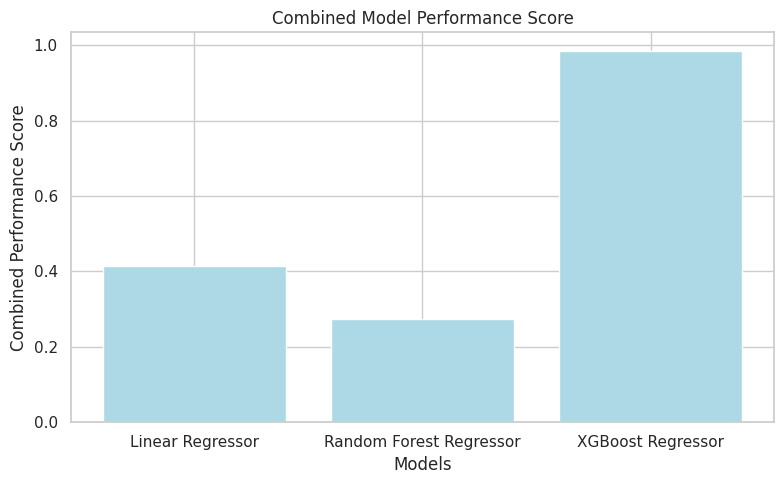

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Model names and corresponding performance metrics
models = ['Linear Regressor', 'Random Forest Regressor', 'XGBoost Regressor']
r2_scores = [0.9277, 0.9183, 0.9395]
mae_scores = [143.5414, 138.1051, 112.6949]
mse_scores = [51647.6032, 58411.6653, 40498.2767]
rmse_scores = [227.2611, 241.6851, 201.2418]

# Normalize the error metrics (MAE, MSE, RMSE) based on their minimum and maximum values
mae_min, mae_max = min(mae_scores), max(mae_scores)
mse_min, mse_max = min(mse_scores), max(mse_scores)
rmse_min, rmse_max = min(rmse_scores), max(rmse_scores)

# Normalize the error metrics
mae_normalized = [(score - mae_min) / (mae_max - mae_min) for score in mae_scores]
mse_normalized = [(score - mse_min) / (mse_max - mse_min) for score in mse_scores]
rmse_normalized = [(score - rmse_min) / (rmse_max - rmse_min) for score in rmse_scores]

# R² is already in the range [0, 1], so no need to normalize it
r2_normalized = r2_scores

# Calculate the combined score for each model
combined_scores = [(r2 + (1 - mae) + (1 - mse) + (1 - rmse)) / 4
                   for r2, mae, mse, rmse in zip(r2_normalized, mae_normalized, mse_normalized, rmse_normalized)]

# Set up the figure for plotting the combined scores
fig, ax = plt.subplots(figsize=(8, 5))

# Bar chart for the combined scores
ax.bar(models, combined_scores, color='lightblue')

# Adding labels and title
ax.set_xlabel('Models')
ax.set_ylabel('Combined Performance Score')
ax.set_title('Combined Model Performance Score')

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
import joblib
joblib.dump(xgb_model, "model.pkl")

['model.pkl']

In [ ]:
joblib.dump(rfe, "rfe_selector.pkl")

['rfe_selector.pkl']

In [ ]:
output = df['rating'].nunique()
output

32